# Parameter Optimization of SVM

A multi-class dataset is a type of dataset where each data point can belong to one of several classes. In other words, there are more than two possible categories or labels that a data point can be assigned to.

For example, in a dataset of different types of animals, each animal might belong to one of several classes such as "cat," "dog," "bird," "fish," etc. Each class represents a distinct category or label.

In machine learning tasks, multi-class classification involves building models that can accurately classify data points into one of these multiple classes. Algorithms such as Support Vector Machines (SVM), Decision Trees, Neural Networks, and others can be used for multi-class classification tasks.

# Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Exploration and Pre-processing

In [23]:
#Load Dataset
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [24]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [25]:
# Handling Categorical values

label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [26]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [27]:
X = df.drop(columns=['Class'])
y = df['Class']

In [28]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [29]:
samples_list = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples_list.append((X_train, X_test, y_train, y_test))

# Support Vector Machine

In [30]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [31]:
def fitness(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [32]:
for i in range(len(samples_list)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0

  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples_list[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitness(kernel, C, gamma)

    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel

  print('Sample', i)
  print('Best Accuracy =', best_accuracy, ', Best Kernel =', best_kernel, ', Best Nu =', best_C, ', Best Epsilon =', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Sample 0
Best Accuracy = 0.77 , Best Kernel = linear , Best Nu = 4.8 , Best Epsilon = 5.62
Sample 1
Best Accuracy = 0.76 , Best Kernel = rbf , Best Nu = 0.95 , Best Epsilon = 7.02
Sample 2
Best Accuracy = 0.69 , Best Kernel = linear , Best Nu = 7.01 , Best Epsilon = 3.96
Sample 3
Best Accuracy = 0.79 , Best Kernel = rbf , Best Nu = 4.35 , Best Epsilon = 0.02
Sample 4
Best Accuracy = 0.65 , Best Kernel = rbf , Best Nu = 7.61 , Best Epsilon = 2.78
Sample 5
Best Accuracy = 0.72 , Best Kernel = rbf , Best Nu = 6.89 , Best Epsilon = 2.77
Sample 6
Best Accuracy = 0.75 , Best Kernel = rbf , Best Nu = 7.03 , Best Epsilon = 3.47
Sample 7
Best Accuracy = 0.87 , Best Kernel = rbf , Best Nu = 0.63 , Best Epsilon = 3.4
Sample 8
Best Accuracy = 0.72 , Best Kernel = linear , Best Nu = 6.05 , Best Epsilon = 3.64
Sample 9
Best Accuracy = 0.66 , Best Kernel = linear , Best Nu = 1.54 , Best Epsilon = 5.55


In [33]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.77,linear,4.80,5.62
1,2,0.76,rbf,0.95,7.02
2,3,0.69,linear,7.01,3.96
3,4,0.79,rbf,4.35,0.02
4,5,0.65,rbf,7.61,2.78
5,6,0.72,rbf,6.89,2.77
6,7,0.75,rbf,7.03,3.47
7,8,0.87,rbf,0.63,3.40
8,9,0.72,linear,6.05,3.64
9,10,0.66,linear,1.54,5.55


In [38]:
result.to_csv("result.csv",index=False)

# Convergence Graph

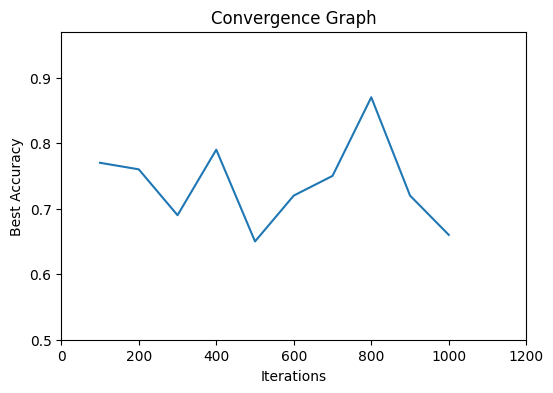

In [51]:
#Convergence Graph

itera=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.figure(figsize=(6, 4))
sns.lineplot(x=itera, y=result['Best Accuracy'])
plt.title('Convergence Graph')
plt.xlabel('Iterations')
plt.ylabel('Best Accuracy')

# Set y-axis to start from 0
plt.xlim(0, 1200)
plt.ylim(0.5, max(result['Best Accuracy']) + 0.1)

plt.savefig('line_plot.png')
plt.show()
